In [1]:
### Imports and preprocessing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load and preprocess data

df = pd.read_csv("matches.csv")
df.dropna(inplace=True)
df['team1_win'] = (df['team1'] == df['winner']).astype(int)
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
X = df[features]
y = df['team1_win']
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

### Split data

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [3]:
### Model training

lr = LogisticRegression(max_iter=500)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

### Validation accuracies

val_scores = {
    "Logistic Regression": accuracy_score(y_val, lr.predict(X_val)),
    "Random Forest": accuracy_score(y_val, rf.predict(X_val)),
    "KNN": accuracy_score(y_val, knn.predict(X_val))
}

val_scores

{'Logistic Regression': 0.5,
 'Random Forest': 0.4583333333333333,
 'KNN': 0.4583333333333333}

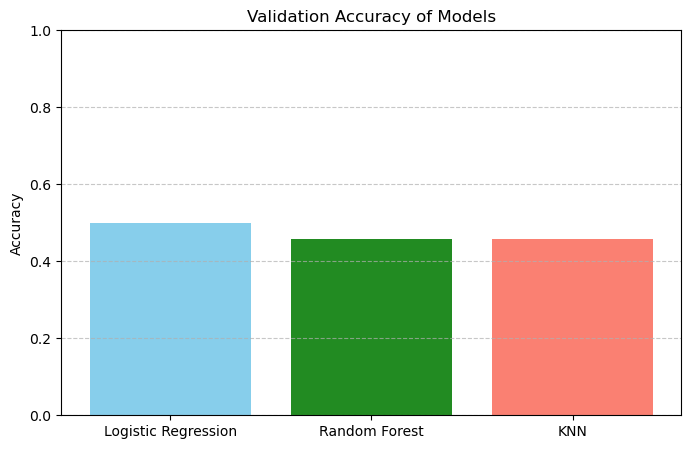

In [5]:
### Validation Accuracy Plot

models = list(val_scores.keys())
scores = list(val_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['skyblue', 'forestgreen', 'salmon'])
plt.title('Validation Accuracy of Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
### Best Model: Logistic Regression

best_model = lr
y_pred_test = best_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Test Accuracy: {test_acc}")
print("\nClassification Report:\n", test_report)

Test Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.17      0.08      0.11        12

    accuracy                           0.33        24
   macro avg       0.28      0.33      0.29        24
weighted avg       0.28      0.33      0.29        24



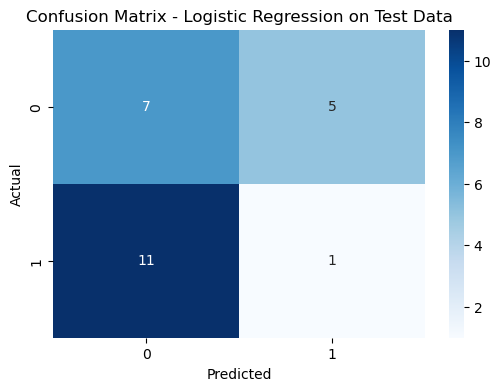

In [9]:
### Confusion Matrix – Logistic Regression

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression on Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
### Ensemble Model (Voting Classifier)

ensemble = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('knn', knn)
], voting='hard')

ensemble.fit(X_train, y_train)
y_ensemble = ensemble.predict(X_test)

ensemble_acc = accuracy_score(y_test, y_ensemble)
ensemble_report = classification_report(y_test, y_ensemble)
ensemble_conf_matrix = confusion_matrix(y_test, y_ensemble)

print(f"Ensemble Accuracy: {ensemble_acc}")

Ensemble Accuracy: 0.4166666666666667


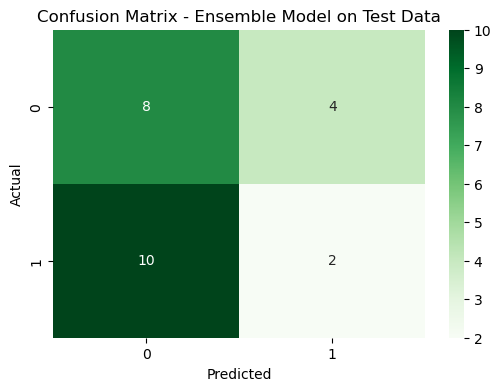

In [13]:
### Confusion Matrix – Ensemble

plt.figure(figsize=(6, 4))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Ensemble Model on Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()